# Machine Learning Homework 2 (deadline: October 8th, 10:15)
## Regression, regularization and cross-validation

In this homework you will experiment with linear regression and see what happens when we use regularized versions of it. More precisely, you will try out Ridge and Lasso regularization. In addition, we will see how using cross-validation helps us to get more stable estimates for our performance.

Read in the data in **data.csv** and split it into training (50%) and testing (50%) set. Use random seed 0 (train_test_split method).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, KFold

In [430]:
data = pd.read_csv("data.csv", index_col = 0)

In [431]:
data.head(1)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,y
0,0.080349,0.639349,0.390906,-0.580971,-0.62003,-0.236409,-0.763078,0.427492,0.96757,0.015933,...,-0.139344,-0.291604,0.266342,-0.049433,-0.160509,-0.424423,-0.265763,-0.087113,0.239603,0.015612


In [432]:
y = data[['y']]
X = data.drop(['y'],axis=1)

In [433]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [434]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(100, 99)
(100, 1)
(100, 99)
(100, 1)


## Task 1. Multivariate linear regression (1 point)

#### <font color='purple'>(a) Implement the fitting procedure of non-regularized multivariate ordinary least squares linear regression, as presented in the lecture slides (matrix operations). Fit on the training data and save the coefficients and the intercept for use in subtask (1c). Print out the coefficients corresponding to the five first features.

In [435]:
## YOUR CODE
print('Coefficients of five first features according to my implementation:', ...)

Coefficients of five first features according to my implementation: Ellipsis


#### <font color='purple'>(b) Call out the `sklearn.linear_model.LinearRegression` learning algorithm from the sklearn package. Fit the model on the training data and save it for use in the following subtasks. Print out the coefficients corresponding to the five first features.

In [436]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)


In [437]:
## YOUR CODE
print('Coefficients of five first features according to sklearn:', regr.coef_[:,:5])

Coefficients of five first features according to sklearn: [[10.92203947  6.06863162 25.85963134 -6.03271353  8.68585618]]


#### <font color='purple'>(c) Demonstrate that the methods of subtasks (1a) and (1b) give the same results by showing that they find the same coefficients (don't forget the intercept). </font>

You maybe won't get exactly the same results because of precision problems of floats so feel free to compare if the values are equal up to some precision (e.g. check if difference is less than 0.0000001 etc). You can use code similar to what has been given below, but you might need to change some things depending on where the intercept is in your implementation.

In [439]:
#assert(abs(my_intercept - reg.intercept_) < 0.000001)
#for i in range(99):
#    assert(abs(my_coef[i] - reg.coef_[0, i]) < 0.000001)

#### <font color='purple'>(d) Using the sklearn model from subtask (1b) predict the results on the training and testing set and calculate and show the root mean square errors (RMSE). Since you need to do the same evaluation in future tasks also, please implement a function 'evaluate' for this.

In [440]:
def evaluate(regression_model_class_instance, trainX, trainY, testX, testY):
    print("\n#################\n")
    print(regression_model_class_instance, '\n')
    
    ## YOUR CODE
    
    rmse_tr = mean_squared_error(trainY, regression_model_class_instance.predict(trainX))
    rmse_te = mean_squared_error(testY,  regression_model_class_instance.predict(testX))
    
    print("RMSE train:", rmse_tr)
    print("RMSE test:", rmse_te)
    
    return rmse_tr, rmse_te

evaluate(regr,X_train,y_train,X_test,y_test)


#################

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) 

RMSE train: 2.569810048142204e-27
RMSE test: 1894.3714209950965


(2.569810048142204e-27, 1894.3714209950965)

## Task 2. Ridge & Lambda regularized regression  (1 point)

This blogpost might clarify regularization a bit: https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

#### <font color='purple'>(a) Implement the fitting procedure of ridge regression, as presented in the lecture slides (matrix operations). Fit on the training data with regularization parameter equal to 1 and save the coefficients and the intercept for use in subtask (2c). Print out the coefficients corresponding to the five first features.

In [441]:
## YOUR CODE
print('Coefficients of five first features according to my implementation:', ...)

Coefficients of five first features according to my implementation: Ellipsis


#### <font color='purple'>(b) Call out the `sklearn.linear_model.Ridge` learning algorithm from the sklearn package. Fit the model on the training data with regularization parameter equal to 1 and save it for use in the following subtasks. Print out the coefficients corresponding to the five first features.</font>

Use parameters `solver = "cholesky", tol = 0.000000000001` in order to get more similar results to your own implementation. The default parameter for the regularization is already 1 so no need to specify that. The parameters `solver` and `tol` are necessary to force sklearn to use closed-form solution. Otherwise it would use numerical optimization which would give more different results from yours. **In the future tasks, please use the default option and don't force it to use the closed-form solution (numerical will be faster!).**

In [442]:
from sklearn.linear_model import Ridge
clf_r = Ridge(alpha=1.0,solver = "cholesky", tol = 0.000000000001)
clf_r.fit(X_train, y_train) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=1e-12)

In [443]:
clf_r.coef_[:,:5]

array([[8.50943673, 7.85583556, 7.11289436, 5.92067445, 4.33351291]])

#### <font color='purple'>(c) Demonstrate the correctess of your implementation the same way as in the previous exercise. For this compare your coefficients and intercept as obtained in subtask (2a) with the coeffiecients and intercept from sklearn, as obtained in subtask (2b). The results can actually vary quite a bit due to implementation differences in matrix operations. Compare that the differences in results (coefficients and intercept) are less than 0.02.

In [444]:
## YOUR CODE

#### <font color='purple'>(d) Train a Lasso model using the sklearn package (use the default regularization parameter) and save it for future use. Print out the coefficients corresponding to the five first features.</font>

In [445]:
from sklearn.linear_model import Lasso
clf_l = Lasso(alpha=1.0)
clf_l.fit(X_train, y_train) 

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

#### <font color='purple'>(e) Evaluate the sklearn Ridge and Lasso models on the training and testing set and calculate and show the RMSE, using the function 'evaluate' from subtask (1d).

In [446]:
evaluate(clf_l,X_train,y_train,X_test,y_test)


#################

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) 

RMSE train: 28.47576162025354
RMSE test: 39.56901142459158


(28.47576162025354, 39.56901142459158)

In [447]:
evaluate(clf_r,X_train,y_train,X_test,y_test)


#################

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=1e-12) 

RMSE train: 0.3211025131846932
RMSE test: 14.86804426078421


(0.3211025131846932, 14.86804426078421)

## Task 3. Choosing a suitable regularization parameter  (1 point)

Since different parameters can lead to very different results we need to do some parameter tuning and find a suitable regularization parameter for both Ridge and Lasso. We could try out different values and see which ones lead to the best results on the test set. However, then we would overfit to our test data and we would not have an adequate estimate of how good the model is in the end. That is why we need to do parameter tuning only using the training set.

Use **alphas = np.linspace(0.01, 10, 100)** for Ridge and **alphas = np.linspace(0.01, 5, 100)** for Lasso. The method generates 100 values with equal steps between the first and second parameter.

#### <font color='purple'>(a) **Method 1:** Divide the training set into training and validation set using 90%/10% split and a random seed 0 (train_test_split method). Train Ridge and Lasso models with different alpha values on the training set and calculate the RMSE values on the validation set. Choose and report the alpha that has the best RMSE for Ridge and another alpha that has best RMSE for Lasso (save both alpha and RMSE values).

In [473]:
def method_1(model_type,alphas,random_state=0):
    
    m1_coeffs = [] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)
    rmses = []
    
    for i in (alphas):
        model = model_type(alpha=i)
        model.fit(X_train, y_train) 
        rmses.append(mean_squared_error(y_test,model.predict(X_test)))
        m1_coeffs.append(model.coef_)
    
    model = model_type(alpha=alphas[rmses.index(min(rmses))])
    model.fit(X_train, y_train)
    
    #print("Best alpha value : ",alphas[rmses.index(min(rmses))],", Best rmse value :",mean_squared_error(y_test,model.predict(X_test)))
    
    return alphas[rmses.index(min(rmses))],mean_squared_error(y_test,model.predict(X_test)),m1_coeffs

  

print("For Ridge Regresion")    
alphas_r = np.linspace(0.01, 10, 100) 
_,_,m1_coeffs_ridge = method_1(Ridge,alphas_r,0)  


print("For Lasso Regresion")
alphas_l = np.linspace(0.01, 5, 100)
_,_,m1_coeffs_lasso = method_1(Lasso,alphas_l,0) 

For Ridge Regresion
For Lasso Regresion


### Using grid search method based on score not test rmse value

In [479]:
def grid_search(model,alphas):

    grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
    grid.fit(X_train, y_train)  
    
    print("Best alpha",grid.best_estimator_.alpha)
    print("RMSE :",mean_squared_error(y_train,grid.predict(X_train)))
    
    return None

print("For Ridge Regresion")
grid_search(clf_r,alphas_r)## ridge
clf_r = Ridge()
print()

print("For Lasso Regresion")
clf_l = Lasso()
grid_search(clf_l,alphas_l) ## lasso

For Ridge Regresion
Best alpha 0.01
RMSE : 0.006600420110570005

For Lasso Regresion
Best alpha 0.01
RMSE : 0.09097258204683509


#### <font color='purple'>(b) **Method 2:** Instead of doing only one training/validation split, use 10-fold cross validation. For each alpha value calculate the validation errors for each of the folds and average the results. Then choose and report the alpha that has the best RMSE for Ridge and another alpha that has best RMSE for Lasso (save both alpha and RMSE values). For doing the 10-fold split use the sklearn method KFold (kf = KFold(n_splits=10, random_state = 0, shuffle = True)). To see more about how to iterate through the folds see the documentation for the method.

In [480]:
from sklearn.cross_validation import cross_val_predict,LeaveOneOut,cross_val_score

In [481]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [535]:
from sklearn.model_selection import KFold

def method_2(model_type,alphas,random_state=0):
    m2_coeffs = []
    K = 10
    kf = KFold(n_splits=K, shuffle=True, random_state=random_state)
    final_test_mse = []
    for index, alpha in enumerate(alphas):
        train_errors = []
        validation_errors = []
        for train_index, val_index in kf.split(X, y):

            # split data
            X_train, X_val = X.iloc[train_index], X.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]

            # instantiate model
            model = model_type(alpha=alpha)

            #calculate errors
            train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, model)

            # append to appropriate list
            train_errors.append(train_error)
            validation_errors.append(val_error)
        m2_coeffs.append(model.coef_)

        # generate report
        final_test_mse.append(np.mean(validation_errors))


    #print("Best alpha value : ",alphas[final_test_mse.index(min(final_test_mse))],", Best rmse value :",min(final_test_mse))

    return alphas[final_test_mse.index(min(final_test_mse))],min(final_test_mse),m2_coeffs
    
m2_coeffs = []    
print("For Ridge Regresion")    
_,_,m2_coeffs_ridge = method_2(Ridge,alphas_r,0)  

print()



print("For Lasso Regresion")
_,_,m2_coeffs_lasso = method_2(Lasso,alphas_l,0)    

For Ridge Regresion


ValueError: Found input variables with inconsistent numbers of samples: [200, 2]

## Task 4. Comparing the stability of Method 1 and Method 2  (1 point)

#### <font color='purple'>(a) Run Method 1 and Method 2 both 10 times, every time using a different value 0,1,2,...,9 as the random_state. Report the best alpha and RMSE for both parameter tuning methods and for both regularization methods for each of the 10 trials.

In [453]:
best_alpha = []
best_rmse_r1 = []

print("For Ridge regression in method 1")
for i in range(10):
    #print("For random_state : ",i )
    alpha_val, rmse_val,_ = method_1(Ridge,alphas_r,i)
    best_alpha.append(alpha_val)
    best_rmse_r1.append(rmse_val)


print("\n Best possible value : \n")        
print("Best alpha value : ",best_alpha[best_rmse_r1.index(min(best_rmse_r1))],"\tBest rmse value : ",min(best_rmse_r1))


print("\n\nFor Ridge regression in method 2")

best_alpha = []
best_rmse_r2 = []



for i in range(10):
    #print("For random_state : ",i )
    alpha_val, rmse_val,_ = method_2(Ridge,alphas_r,i)
    best_alpha.append(alpha_val)
    best_rmse_r2.append(rmse_val)
    
print("\n Best possible value : \n")        
print("Best alpha value : ",best_alpha[best_rmse_r2.index(min(best_rmse_r2))],"\tBest rmse value : ",min(best_rmse_r2))

For Ridge regression in method 1

 Best possible value : 

Best alpha value :  0.8172727272727273 	Best rmse value :  0.41996235220985206


For Ridge regression in method 2

 Best possible value : 

Best alpha value :  0.21181818181818182 	Best rmse value :  0.6674848653616154


In [454]:
best_alpha = []
best_rmse_l1 = []




print("For Lasso regression in method 1")
for i in range(10):
    #print("For random_state : ",i )
    alpha_val, rmse_val,_ = method_1(Lasso,alphas_l,i)
    best_alpha.append(alpha_val)
    best_rmse_l1.append(rmse_val)
   


print("\n Best possible value : \n")        
print("Best alpha value : ",best_alpha[best_rmse_l1.index(min(best_rmse_l1))],"\tBest rmse value : ",min(best_rmse_l1))


print("\n\nFor Lasso regression in method 2")

best_alpha = []
best_rmse_l2 = []



for i in range(10):
    #print("For random_state : ",i )
    alpha_val, rmse_val,_ = method_2(Lasso,alphas_l,i)
    best_alpha.append(alpha_val)
    best_rmse_l2.append(rmse_val)
    
print("\n Best possible value : \n")        
print("Best alpha value : ",best_alpha[best_rmse_l2.index(min(best_rmse_l2))],"\tBest rmse value : ",min(best_rmse_l2))

For Lasso regression in method 1

 Best possible value : 

Best alpha value :  0.01 	Best rmse value :  0.3057669571385311


For Lasso regression in method 2

 Best possible value : 

Best alpha value :  0.01 	Best rmse value :  0.44268394627805296


## Both boxplot  in a single plot 

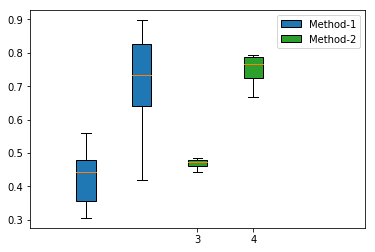

In [455]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)

data1 = np.array(list(zip(best_rmse_l1,best_rmse_r1)))
data2 = np.array(list(zip(best_rmse_l2,best_rmse_r2)))


fig, ax = plt.subplots()
bp1 = ax.boxplot(data1, positions=[1,2], notch=False, widths=0.35, 
                 patch_artist=True, boxprops=dict(facecolor="C0"))
bp2 = ax.boxplot(data2, positions=[3,4], notch=False, widths=0.35, 
                 patch_artist=True, boxprops=dict(facecolor="C2"))

ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Method-1', 'Method-2'], loc='upper right')

ax.set_xlim(0,6)
plt.show()

#### <font color='purple'>(b) What can you say about the stability of the methods? Which one gives more stable information about which alpha to use? Which alpha values turn out to be best in the end for these data?

**Answer:**

#### <font color='purple'>(c) Create two plots (one for Ridge and one for Lasso) where on each plot there are two boxplots - one for showing the distribution of the RMSE values for the 10 trials for Method 1 and the other for Method 2.

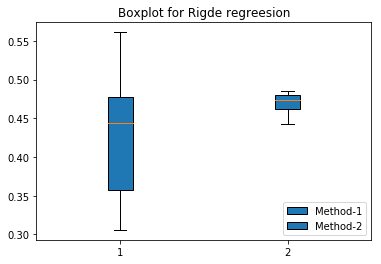

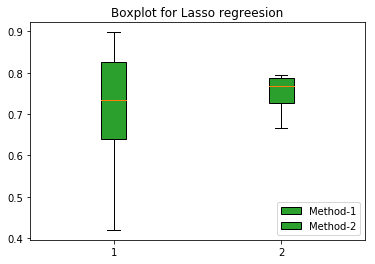

In [456]:
ridge_p = [best_rmse_l1, best_rmse_l2]
lasso_p = [best_rmse_r1, best_rmse_r2]

bp1 = plt.boxplot(ridge_p,patch_artist=True,boxprops=dict(facecolor="C0"))
plt.title("Boxplot for Rigde regreesion")
plt.legend([bp1["boxes"][0], bp1["boxes"][1]], ['Method-1', 'Method-2'], loc='lower right')
plt.show()


bp2 = plt.boxplot(lasso_p,patch_artist=True,boxprops=dict(facecolor="C2"))
plt.title("Boxplot for Lasso regreesion")
plt.legend([bp2["boxes"][0], bp2["boxes"][1]], ['Method-1', 'Method-2'], loc='lower right')
plt.show()

#### <font color='purple'>(d) Comment on why the results look like they do? In general, when tuning parameters, is it better to use one training-validation split or K-fold cross-validation? Why?

**Answer:**

## Task 5. Regularization parameter effect on the coefficients  (1 point)

#### <font color='purple'>(a) The regularization parameter influences the values of the coefficients. Create two plots (one for Ridge and one for Lasso) that have the regularization parameter on the x-axis and coefficient values on the y-axis. You don't have to take all 99 values, you can take for example the first 20. Show each coefficient as a line (on the same plot) and comment on what happens when the regularization parameter increases. </font>

In [490]:
m1_coeffs_lasso[0][:20]

array([ 9.83375294e+00,  8.86075264e+00,  7.99836770e+00,  6.86628738e+00,
        5.82279000e+00,  4.83665635e+00,  4.05084304e+00,  2.84697189e+00,
        1.93204819e+00,  9.13416970e-01,  4.90893384e-02,  3.43709961e-02,
       -1.19093429e-02,  0.00000000e+00,  0.00000000e+00, -4.06371033e-03,
       -2.31618407e-03,  0.00000000e+00,  9.10572034e-02,  0.00000000e+00])

D:\Software\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[Text(0,0,'cat1'), Text(0,0,'cat2')]

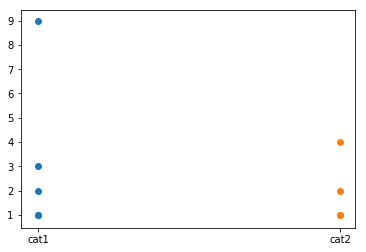

In [492]:
import matplotlib.pyplot as plt
import numpy as np

y = [(1,1,2,3,9),(1,1,2,4)]
x = [1,2]

for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye)

plt.xticks([1, 2])
plt.axes().set_xticklabels(['cat1', 'cat2'])

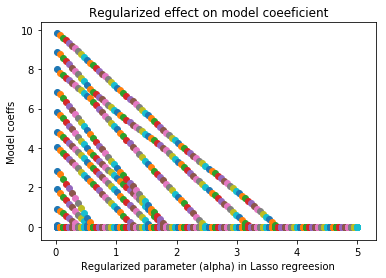

In [532]:
m1_coeffs_lasso = np.array(m1_coeffs_lasso)
for xe, ye in zip(alphas_l, m1_coeffs_lasso[:,:20]):
    
    plt.scatter([xe] * len(ye), ye)
    plt.xlabel("Regularized parameter (alpha) in Lasso regreesion")
    plt.ylabel('Model coeffs')
    plt.title("Regularized effect on model coeeficient")   

In [534]:
m1_coeffs_ridge.shape

(100, 1, 99)

ValueError: x and y must be the same size

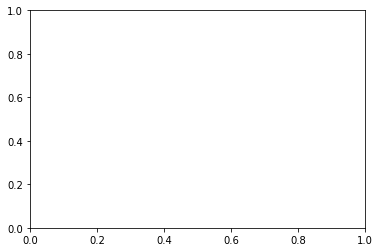

In [533]:
m1_coeffs_ridge = np.array(m1_coeffs_ridge)
for xe, ye in zip(alphas_r, m1_coeffs_ridge[:,:20]):
    
    plt.scatter([xe] * len(ye), ye)
    plt.xlabel("Regularized parameter (alpha) in Ridge regreesion")
    plt.ylabel('Model coeffs')
    plt.title("Regularized effect on model coeeficient")   

#### <font color='purple'>(b) What does Ridge regression do and what does Lasso regression do? How do they differ? </font>

**Answer:**

## Task 6. Evaluating different models  (1 point)

#### <font color='purple'>(a) Choose the values of alpha for Ridge and Lasso according to subtask (4b). Now let's see which model works best for our data by evaluating the test RMSE. Compare the following models by reporting the training and testing set RMSE: </font>

1. Non-regularized linear regression
2. Ridge regression with your chosen parameter
3. Lasso regression with your chosen parameter
4. A "dumb" model that always predicts the mean value of y_train
5. An ideal model that the instructors have used for generating the data (the true coefficients are [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0, ..., 0] and intercept 0).

#### <font color='purple'>(b) Which method gives the best results and by looking at which value do you claim that? Why did this method work the best in your opinion?

**Answer:**

#### <font color='purple'>(c) Were all of the "smart" models better than the "dumb" one. What would it mean if the learned model would give worse results?

**Answer:**

#### <font color='purple'>(d) Were the learned models far from the ideal one? Were the learned coefficients similar to the true ones?

**Answer:**

#### <font color='purple'>(e) Which model overfitted the most, how can you see that?

**Answer:**

#### <font color='purple'>(f) Are regularized methods always better than methods without regularization (not only in this case but in general). Why/why not?

**Answer:**

## Optional Bonus Task 7. Dual perceptron (Bonus, 1 point)

#### <font color='purple'> Implement the dual perceptron algorithm. </font>

<img src="dual_perceptron.png" alt="Dual perceptron" style="width: 500px;"/>

**Note:** check `pandas` [manual about indexing data](https://pandas.pydata.org/pandas-docs/stable/indexing.html) and [iterrows documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html), it could be useful

In [6]:
x1 = np.array([5, 6, 7, 7, 8, 9, 0, 1, 2, 4, 5, 6])
x2 = np.array([2, 1, 3, 5, 10, 3, 4, 8, 6, 10, 9, 11])
y = np.array([1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1])

data = pd.DataFrame({'x1': x1, 'x2': x2, 'y':y})
data['x0'] = np.ones_like(data['x1']) # Don't forget to create homogeneous coordinates!
data = data[['x0', 'x1', 'x2', 'y']]
data.head()

NameError: name 'np' is not defined

In [ ]:
def dual_perceptron(data):
    # Your code goes here
    return w

Test your solution:

In [ ]:
w = dual_perceptron(data)
xs= np.linspace(0,8,100)
ys = (-1) * (w[1] / w[2]) * xs - w[0] / w[2]

fig = plt.figure(figsize=(5,5))
plt.plot(x1[y<0], x2[y<0], 'bo')
plt.plot(x1[y>0], x2[y>0], 'ro')
plt.yticks(np.arange(13))
plt.xticks(np.arange(13))
plt.plot(xs, ys, color = "green")

plt.show()